In [ ]:
pip install FlowCal

     |████████████████████████████████| 92kB 4.8MB/s 
  Created wheel for FlowCal: filename=FlowCal-1.3.0-cp37-none-any.whl size=84550 sha256=86d69901fd438800d0e051612c10f6c5796c04064affa48117b349fb3dc9723f
  Stored in directory: /root/.cache/pip/wheels/84/2f/ec/66a6abb60373dccc3b06c7c14a940477980326701cd6817700
Successfully built FlowCal


In [ ]:
import FlowCal
s = FlowCal.io.FCSData('/content/EGFR_A1_A01_001 (1).fcs')

FCS files are standard files in which flow cytometry data is stored. Normally, one FCS file corresponds to one sample.

The object FlowCal.io.FCSData allows a user to open an FCS file. The following instruction opens the file Data001.fcs from the FCFiles folder, loads the information into an FCSData object, and assigns it to a variable s.

In [ ]:
print (s.shape)

(20000, 7)


In [ ]:
s_sub = s[:100]

In [ ]:
print (s_sub.shape)

(100, 7)


In [ ]:
s_sub_ch = s[:, [3, 4, 5]]

In [ ]:
print (s_sub_ch.shape)

(20000, 3)


In [ ]:
print (s.channels)

('FSC-A', 'SSC-A', 'PE-Texas Red-A', 'FITC-A', 'PE-A', 'APC-Cy7-A', 'Time')


In [ ]:
 print (s_sub_ch.channels)

('FITC-A', 'PE-A', 'APC-Cy7-A')


In [ ]:
s_sub_ch_2 = s[:, ['FITC-A', 'PE-A', 'APC-Cy7-A']]

In [ ]:
print (s_sub_ch_2.channels)

('FITC-A', 'PE-A', 'APC-Cy7-A')


One of the most practical features of an FCSData object is the ability to slice channels using their name. For example, if we want the fluorescence channels we can use the following.

In [ ]:
import numpy as np
np.all(s_sub_ch == s_sub_ch_2)

True

Transforming to Arbitrary Fluorescence Units (a.u.)


loading file Data001.fcs into an FCSData object called s.

In [ ]:
import FlowCal

In [ ]:
 s = FlowCal.io.FCSData('/content/EGFR_A1_A01_001 (1).fcs')

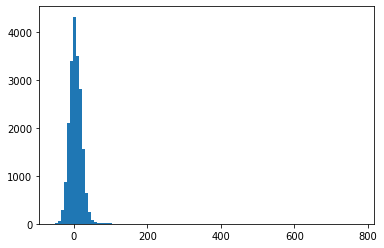

In [ ]:
 import matplotlib.pyplot as plt
 plt.hist(s[:, 'FITC-A'], bins=100)
 plt.show()

Fortunately, FlowCal includes FlowCal.transform.to_rfi(), a function that reads all the necessary paremeters from the FCS file and figures out how to convert data back to a.u.

In [ ]:
 s_transformed = FlowCal.transform.to_rfi(s, channels='FITC-A')

s_transformed now contains the same data as s, except that the FL1 channel has been transformed to a.u. Let’s now look at the transformed data.



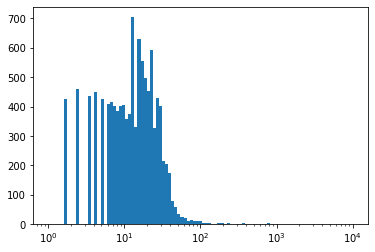

In [ ]:
import numpy as np
bins = np.logspace(0, 4, 100)
plt.hist(s_transformed[:, 'FITC-A'], bins=bins)
plt.xscale('log')
plt.show()

In [ ]:
s_transformed = FlowCal.transform.to_rfi(s)

FlowCal.transform.to_rfi() can transform several channels at the same time. In fact, all channels will be transformed if no channel is specified.



In [ ]:
import FlowCal

In [ ]:
import matplotlib.pyplot as plt

Let’s load the data from file EGFR_A1_A01.fcs into an FCSData object called s, and tranform all channels to arbitrary units.



In [ ]:
s = FlowCal.io.FCSData('/content/EGFR_A1_A01_001 (1).fcs')

In [ ]:
 print (s_sub_ch.channels)

('FITC-A', 'PE-A', 'APC-Cy7-A')


In [ ]:
s = FlowCal.transform.to_rfi(s)

One is often interested in the fluorescence distribution across a population of cells. This is represented in a histogram. Since FCSData is a numpy array, one could use the standard hist function included in matplotlib. Alternatively, FlowCal includes its own histogram function specifically tailored to work with FCSData objects. For example, one can plot the contents of the FL1 channel with a single call to FlowCal.plot.hist1d().



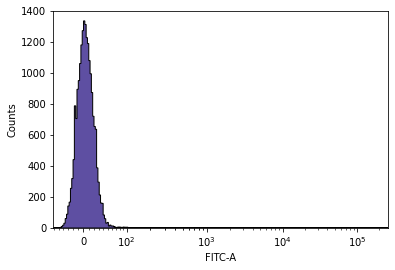

In [ ]:
FlowCal.plot.hist1d(s, channel='FITC-A')

By default, FlowCal.plot.hist1d() uses something called logicle scaling for the x axis. This scaling allows visualization of high fluorescence values with logarithmic spacing, and low fluorescence values with a more linear spacing. In some modern flow cytometers, negative events may be present, and logicle scaling allows visualization of those as well. This can be changed to a more conventional linear or logarithmic scale by using the xscale argument. In addition, FlowCal.plot.hist1d() uses 256 uniformly spaced bins by default. We can override the default bins using the bins argument. Let’s try using 1024 logarithmically-spaced bins.



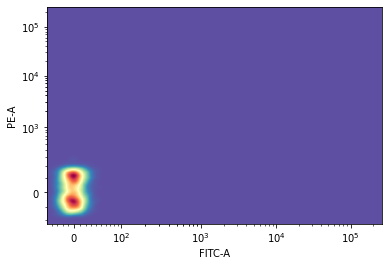

In [ ]:
FlowCal.plot.density2d(s, channels=['FITC-A', 'PE-A'])

It is also common to look at the forward scatter and side scatter values in a 2D histogram, scatter plot, or density diagram. From those, the user can extract size and shape information that would allow him to differentiate between cells and debris. FlowCal includes the function FlowCal.plot.density2d() for this purpose.



The color indicates the number of events in the region, with red indicating a bigger number than yellow and blue, in that order, by default. Similarly to FlowCal.plot.hist1d(), FlowCal.plot.density2d() uses logicle scaling by default. In addition, FlowCal.plot.density2d() applies, by default, gaussian smoothing to the density plot.



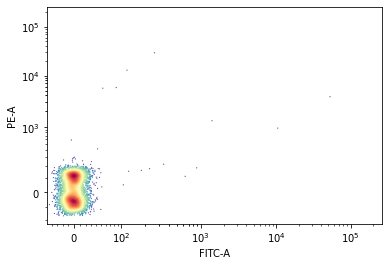

In [ ]:
FlowCal.plot.density2d(s, channels=['FITC-A', 'PE-A'], mode='scatter')

The last plot shows three distinct populations. The one in the middle corresponds to cells, whereas the ones at the left and below correspond to non-biological debris. W

In [ ]:
import FlowCal

In [ ]:
s = FlowCal.io.FCSData('/content/EGFR_A1_A01_001 (1).fcs')
s = FlowCal.transform.to_rfi(s)

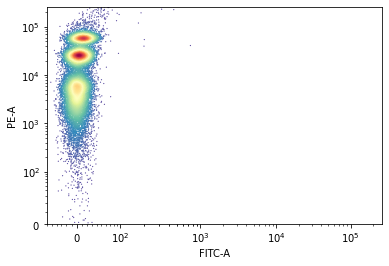

In [ ]:
s_g1 = FlowCal.gate.high_low(s, channels=['PE-A'])
FlowCal.plot.density2d(s_g1,
                      channels=['FITC-A', 'PE-A'],
                      mode='scatter')
plt.show()

Some flow cytometers will capture events outside of their range and assign them either the lowest or highest possible values of a channel, depending on which side of the range they fall on. We call these events “saturated”. Including them in the analysis results, most of the time, in distorted distribution shapes and incorrect statistics. Therefore, it is generally advised to remove saturated events. To do so, FlowCal incorporates the function FlowCal.gate.high_low(). This function retains all the events in the specified channels between two specified values: a high and a low threshold. If these values are not specified, however, the function uses the saturating values.

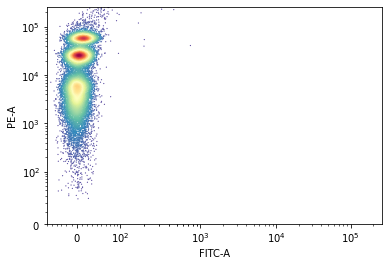

In [ ]:
s_g2 = FlowCal.gate.high_low(s_g1, channels='PE-A', low=25)
FlowCal.plot.density2d(s_g2,
                        channels=['FITC-A', 'PE-A'],
                        mode='scatter')
plt.show()